## Analytic description of WPIT.LandauDamp_mod routines with examples

In [1]:
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt


plt.rc('font', family='serif')

#Define WPIT package location
current_dir =  os.path.abspath(os.path.dirname('__file__'))
fpath = os.path.abspath(current_dir + "/..")
sys.path.append(fpath)

import WPIT.Environment_mod as env
import WPIT.WaveProperties_mod as wave
import WPIT.LandauDamp_mod as landau
import WPIT.LandauDamp_mod.RayUtils_mod as ray

 <a class="anchor" id="top-bullet"></a>
### Table of Contents

* [WPIT.LandauDamp.distribution_bell](#distribution_bell-bullet)
* [WPIT.LandauDamp.distribution_bortnik](#distribution_bortnik-bullet)
* [WPIT.LandauDamp.distribution_golden](#distribution_golden-bullet)
* [WPIT.LandauDamp.distribution_bimaxwellian](#distribution_bimaxwellian-bullet)
* [WPIT.LandauDamp.RayUtils_mod.read_input_ray](#read_input_ray-bullet)
* [WPIT.LandauDamp.RayUtils_mod.append_ray](#append_ray-bullet)
* [WPIT.LandauDamp.RayUtils_mod.read_appended_ray](#read_appended_ray-bullet)
* [WPIT.LandauDamp.RayUtils_mod.resonance_along_raypath](#resonance_along_raypath-bullet)
* [WPIT.LandauDamp.RayUtils_mod.enhancement_factor](#enhancement_factor-bullet)
* [WPIT.LandauDamp.RayUtils_mod.ray_plots](#ray_plots-bullet)

### 1. LandauDamp_mod.distribution_bell <a class="anchor" id="distribution_bell-bullet"></a>

**Routine to calculate the suprathermal electron distribution according to Bell et al., 2002**

***
**<font color='blue'>Description</font>**

Bell et al.[2002] derived the distribution of 0.1 to 1.5 keV electrons, based on measurements of the HYDRA instrument onboard the POLAR satellite. They proposed the distribution of the form:

$$f^{Bell}(u)=\frac{a}{u^4}-\frac{b}{u^5}+\frac{c}{u^6}$$

with $a=4.9\cdot10^{5}/(cm^{-2}\cdot s)$, $b=8.3\cdot10^{14}/(cm \cdot s^{2})$ and $b=5.4 \cdot 10^{23}/(s^3)$

Bortnik et al. [2006] used a scale factor to adress understimations of the Bell distribution. So in their calculations of Landau damping used a scale factor of 10, thus:

$$f^{Bortnik}(u)=10f^{Bell}(u)$$
***

**<font color='red'>Inputs</font>**

**vperp**: perpendicular velocity

**vpar**: parallel velocity


***

**<font color='green'>Outputs</font>**

**f**: electron distribution

***

**Reference**

Bell, T. F., Inan, U. S., Bortnik, J., & Scudder, J. D. (2002). The Landau damping of magnetospherically reflected whistlers within the plasmasphere. Geophysical research letters, 29(15), 23-1.

Bortnik, J., Inan, U. S., & Bell, T. F. (2006). Landau damping and resultant unidirectional propagation of chorus waves. Geophysical research letters, 33(3).

***
[Return to top](#top-bullet) 

### 2. LandauDamp_mod.distribution_bortnik <a class="anchor" id="distribution_bortnik-bullet"></a>

**Routine to calculate the suprathermal electron distribution according to Bortink et al.[2007]**

***

**<font color='blue'>Description</font>**

Bortnik et al.[2002] derived the distribution of 0.213 to 16.5 keV electrons, based on measurements of the CRRES satellite. They proposed the distribution of the form:

$$f^{Bortnik}(u)=\frac{A_N}{v^n}$$

with 

$$A_N=\frac{2\times10^{\alpha_0}}{\Big(\frac{1}{2}m'\Big)^{\alpha_1-1}}$$

$$n=2\alpha_1+2$$

$$m'=\kappa_0m_e$$

$$\kappa_0=6.25*(10^{11})$$

$$\alpha_1=0.755$$

$$\alpha_0=\log(2.14 \times 10^7) $$


***

**<font color='red'>Inputs</font>**

**vperp**: perpendicular velocity

**vpar**: parallel velocity


***

**<font color='green'>Outputs</font>**

**f**: electron distribution

***

**Reference**

Bortnik, J., R. M. Thorne, and N. P. Meredith (2007), Modeling the propagation characteristics of chorus using CRRESsuprathermal electron fluxes,J. Geophys. Res.,112, A08204, doi:10.1029/2006JA012237.

***
[Return to top](#top-bullet) 

### 3. LandauDamp_mod.distribution_golden <a class="anchor" id="distribution_golden-bullet"></a>

**Routine to calculate the suprathermal electron distribution according to Golden et al.[2010]**

***

**<font color='blue'>Description</font>**

A hybrid model that smooths the Bell and Bortnik distributions at the plasmashere boundary:

$$f_{hybrid}=exp\Bigg(\frac{\log(f_{Bell})w^{Bell}+\log(f_{Bortnik})w^{Bortnik}}{w^{Bortnik}+w^{Bell}} \Bigg)$$

where the waheights:

$$w^{Bell}=\frac{exp(-\alpha(L_{meas}-L_{PP}))}{1+exp(-\alpha(L_{meas}-L_{PP}))}$$
$$w^{Bortnik}=\frac{exp(\alpha(L_{meas}-L_{PP}))}{1+exp(\alpha(L_{meas}-L_{PP}))}$$

where $L_{meas}$ is the L shell of interest and $L_{pp}$ is the plasmapause location.
***

**<font color='red'>Inputs</font>**

**vperp**: perpendicular velocity

**vpar**: parallel velocity

**kpmax**: Kpmax for calculating plasmapause location according to Carpender and Anderson [1992]  

**Lmeas**: L shell

***

**<font color='green'>Outputs</font>**

**f**: electron distribution

***

**Reference**

Golden, D. I., M. Spasojevic, F. R. Foust, N. G. Lehtinen, N. P. Meredith, and U. S. Inan (2010), Role of the
plasmapause in dictating the ground accessibility of ELF/VLF chorus, J. Geophys. Res., 115, A11211,
doi:10.1029/2010JA015955.

***
[Return to top](#top-bullet) 

### 4. LandauDamp_mod.distribution_bimaxwellian <a class="anchor" id="distribution_bimaxwellian-bullet"></a>

**Calculate the anistorpic bi-maxwellian distribution**

***

**<font color='blue'>Description</font>**

According to Maxworth et al. [2020]

$$f_{bimax}=\frac{n_h}{(3/2)2\pi U_\parallel U_\perp^2}exp\Bigg(\frac{-u_\parallel^2}{2 U_\parallel^2} \Bigg)\frac{1}{1-\beta}\Bigg[ exp\Bigg(\frac{-u_\perp^2}{2 U_\perp^2} \Bigg) - exp\Bigg(\frac{-u_\perp^2}{2\beta U_\perp^2} \Bigg)\Bigg]$$

where

$n_h$: hot energetic electron density

$U_\parallel$: parallel component of thermal momentum per unit mass

$U_\perp$: perpendicular component of thermal momentum per unit mass

$u_\parallel$: $\gamma v_\parallel$

$u_\perp$: $\gamma v_\perp$

$\beta$: defines the loss cone, the larger the beta the larger the loss cone

Following Maxworth et al. [2020], we define: $n_h=2\times10^{-3} m^{-3}$, $U_\parallel=0.05c$,$U_\perp=0.03c$,
$\beta=0.01$
***

**<font color='red'>Inputs</font>**

**vperp**: perpendicular velocity

**vpar**: parallel velocity


***

**<font color='green'>Outputs</font>**

**f**: electron distribution

***

**Reference**

Maxworth, A. S., Gołkowski, M., Malaspina, D. M., & Jaynes, A. N. (2020). Raytracing study of source regions of whistler mode wave power distribution relative to the plasmapause. Journal of Geophysical Research: Space Physics, 125, e2019JA027154. https://doi.org/10.1029/2019JA027154

***
[Return to top](#top-bullet) 

### Example

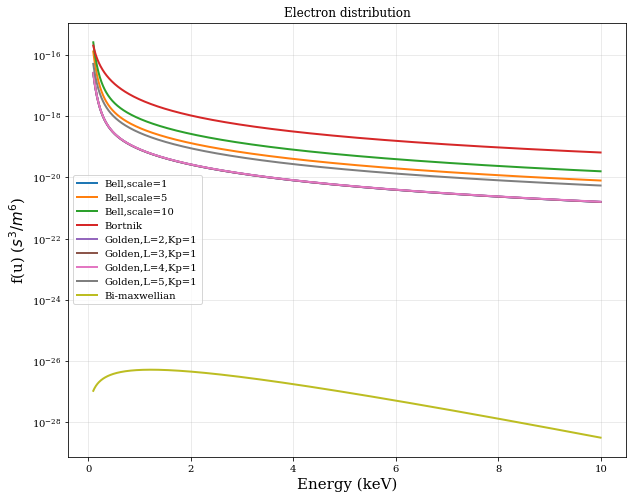

In [2]:
Ekev_range=np.arange(0.1,10,0.01)
alpha=np.deg2rad(1)
f_bell=[]
f_bortnik=[]
f_goldenL2=[]
f_goldenL3=[]
f_goldenL4=[]
f_goldenL5=[]
f_maxw=[]
Kpmax=1
L2=2
L3=3
L4=4
L5=5
for i in range(0,len(Ekev_range)):
    upar0,uper0,ppar0,pper0,gamma0=env.initial_velocity(Ekev_range[i],alpha,env.const.me)
    
    f1_tmp=landau.distribution_bell(uper0,upar0)
    f_b=landau.distribution_bortnik(uper0,upar0)
    f_gL2=landau.distribution_golden(uper0,upar0,Kpmax,L2)
    f_gL3=landau.distribution_golden(uper0,upar0,Kpmax,L3)
    f_gL4=landau.distribution_golden(uper0,upar0,Kpmax,L4)
    f_gL5=landau.distribution_golden(uper0,upar0,Kpmax,L5)
    fmaxwtmp=landau.distribution_bimaxwellian(uper0,upar0)
    f_goldenL2.append(f_gL2)
    f_goldenL3.append(f_gL3)
    f_goldenL4.append(f_gL4)
    f_goldenL5.append(f_gL5)
    f_bortnik.append(f_b)
    f_bell.append(f1_tmp)
    f_maxw.append(fmaxwtmp)

    
f_bell=np.asarray(f_bell)
f_bortnik=np.asarray(f_bortnik)

###plot###############################
fig, ax = plt.subplots(figsize=(10,8))
s=2
fonts=15

ax.plot(Ekev_range,f_bell,label='Bell,scale=1',linewidth=s)
ax.plot(Ekev_range,5*f_bell,label='Bell,scale=5',linewidth=s)
ax.plot(Ekev_range,10*f_bell,label='Bell,scale=10',linewidth=s)
ax.plot(Ekev_range,f_bortnik,label='Bortnik',linewidth=s)
ax.plot(Ekev_range,f_goldenL2,label='Golden,L=2,Kp=1',linewidth=s)
ax.plot(Ekev_range,f_goldenL3,label='Golden,L=3,Kp=1',linewidth=s)
ax.plot(Ekev_range,f_goldenL4,label='Golden,L=4,Kp=1',linewidth=s)
ax.plot(Ekev_range,f_goldenL5,label='Golden,L=5,Kp=1',linewidth=s)
ax.plot(Ekev_range,f_maxw,label='Bi-maxwellian',linewidth=s)
ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_title('Electron distribution')
ax.set_ylabel('f(u) ($s^3/m^6$)',fontsize=fonts)
ax.set_xlabel(r'Energy (keV)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()


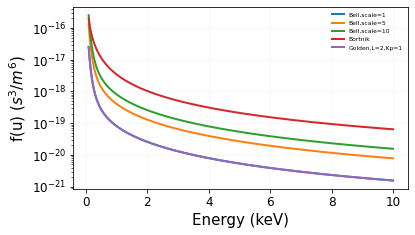

In [5]:
Ekev_range=np.arange(0.1,10,0.01)
alpha=np.deg2rad(1)
f_bell=[]
f_bortnik=[]
f_goldenL2=[]
f_goldenL3=[]
f_goldenL4=[]
f_goldenL5=[]
f_maxw=[]
Kp1=1
Kp5=5
L2=2
L3=3
L4=4
L5=5
for i in range(0,len(Ekev_range)):
    upar0,uper0,ppar0,pper0,gamma0=env.initial_velocity(Ekev_range[i],alpha,env.const.me)
    
    f1_tmp=landau.distribution_bell(uper0,upar0)
    f_b=landau.distribution_bortnik(uper0,upar0)
    f_gL2_1=landau.distribution_golden(uper0,upar0,Kp1,L2)
    f_gL2_5=landau.distribution_golden(uper0,upar0,Kp5,L2)
#     f_gL3=landau.distribution_golden(uper0,upar0,Kpmax,L3)
#     f_gL4=landau.distribution_golden(uper0,upar0,Kpmax,L4)
#     f_gL5=landau.distribution_golden(uper0,upar0,Kpmax,L5)
#     fmaxwtmp=landau.distribution_bimaxwellian(uper0,upar0)
    f_goldenL2.append(f_gL2_1)
    f_goldenL3.append(f_gL2_5)
    f_goldenL4.append(f_gL4)
    f_goldenL5.append(f_gL5)
    f_bortnik.append(f_b)
    f_bell.append(f1_tmp)
    f_maxw.append(fmaxwtmp)

    
f_bell=np.asarray(f_bell)
f_bortnik=np.asarray(f_bortnik)

###plot###############################
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
inch_to_mm=0.0393700787
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=2
fonts=15

ax.plot(Ekev_range,f_bell,label='Bell,scale=1',linewidth=s)
ax.plot(Ekev_range,5*f_bell,label='Bell,scale=5',linewidth=s)
ax.plot(Ekev_range,10*f_bell,label='Bell,scale=10',linewidth=s)
ax.plot(Ekev_range,f_bortnik,label='Bortnik',linewidth=s)
ax.plot(Ekev_range,f_goldenL2,label='Golden,L=2,Kp=1',linewidth=s)
# ax.plot(Ekev_range,f_goldenL3,label='Golden,L=2,Kp=5',linewidth=s,linestyle='dashed')
# ax.plot(Ekev_range,f_goldenL4,label='Golden,L=4,Kp=1',linewidth=s)
# ax.plot(Ekev_range,f_goldenL5,label='Golden,L=5,Kp=1',linewidth=s)
# ax.plot(Ekev_range,f_maxw,label='Bi-maxwellian',linewidth=s)
ax.set_yscale('log')
ax.grid(alpha=.1)
# ax.set_xlim(-90,90)
# ax.set_title('Electron distribution')
ax.set_ylabel('f(u) ($s^3/m^6$)',fontsize=fonts)
ax.set_xlabel(r'Energy (keV)',fontsize=fonts)
ax.legend(frameon=False,loc=1, prop={'size': 6})
# ax.set_ylim(0,5)

plt.savefig('distributions.jpg',dpi=300, bbox_inches="tight")
plt.show()


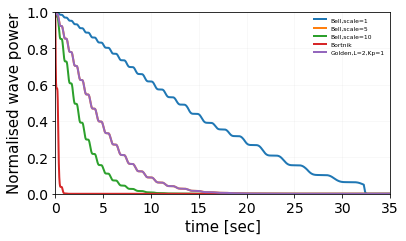

In [54]:
import pandas as pd
dfbell1=pd.read_csv('example_rays/bellscale1.csv')
dfbell5=pd.read_csv('example_rays/bellscale5.csv')
dfbell10=pd.read_csv('example_rays/bellscale10.csv')
dfbortnik=pd.read_csv('example_rays/bortnik.csv')
dfgolden=pd.read_csv('example_rays/goldenkp1.csv')

dampbell1=dfbell1.damp
timebell1=dfbell1.time
dampbell5=dfbell5.damp
timebell5=dfbell5.time
dampbell10=dfbell10.damp
timebell10=dfbell10.time
dampbortnik=dfbortnik.damp
dampgolden=dfgolden.damp
timebortnik=dfbortnik.time
timegolden=dfgolden.time

###plot###############################
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
inch_to_mm=0.0393700787
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=2
fonts=15

ax.plot(timebell1,dampbell1,label='Bell,scale=1',linewidth=s)
ax.plot(timebell5,dampbell5,label='Bell,scale=5',linewidth=s)
ax.plot(timebell10,dampbell10,label='Bell,scale=10',linewidth=s)
ax.plot(timebortnik,dampbortnik,label='Bortnik',linewidth=s)
ax.plot(timegolden,dampgolden,label='Golden,L=2,Kp=1',linewidth=s)

ax.grid(alpha=.1)
ax.set_xlim(0,35)
ax.set_ylim(0,1)
# ax.set_title('Electron distribution')
ax.set_ylabel('Normalised wave power',fontsize=fonts)
ax.set_xlabel(r'time [sec]',fontsize=fonts)
ax.legend(frameon=False,loc=1, prop={'size': 6})
# ax.set_ylim(0,5)

plt.savefig('damps.jpg',dpi=300, bbox_inches="tight")
plt.show()

[Return to top](#top-bullet) 

### 5. LandauDamp_mod.landau_damping <a class="anchor" id="landau_damping-bullet"></a>

**Calculates the Landau damping of a ray**
***
We calculate the spatial growth rate $\chi$ based on the formulation of Brinca[1972], who expanded the work of Kennel[1966].

$$\chi = - \frac{ck_i}{\omega} 
       = \frac{A_N}{4\mu(2A\mu^2-B)} \Bigg[ \frac{\mu^2 \sin^2 \theta -P}{2(S-\mu^2) } \Gamma_1 \Big[  (R-\mu^2) J_{m_1} + (L- \mu^2 ) J_{m+1} \Big]^2 G_1 - 2 \Big[ (S-\mu^2 \cos^2 \theta)(S-\mu^2)-D^2\Big] \Lambda_1 J_m G_2 - 2 \mu^2 \sin \theta \cos \theta \Gamma_1 \Big[ (R-\mu^2) J_{m-1} + (L-\mu^2 ) J_{m+1} \Big]^2 G2 \Bigg]$$

where the symbols D, L, P , R, and S are the Stix parameters, and:

$$A=S\sin^2\theta+P\cos^2\theta$$
$$B=RLsin^2\theta+PS(1+\cos^2\theta)$$
$$C=PRL$$

$\mu$ is the real part of the refractive index, $A_N$ is the normalization constant ,the argument of the Bessel functions $J_i$ is $\beta$ and the
operators $\Gamma_1$ and $\Lambda_1$ are defined as:

$$\Gamma_1= \frac{2 \pi^2 \omega_{pe}^2 }{\omega k_z} \sum_{m=-\infty}^{\infty} \int_{0}^{\infty}
 u_{\perp}^2 d u_{\perp} \int_{-\infty}^{\infty} du_z \delta (u_z-u_z^{res})   $$

$$\Lambda_1= \frac{2 \pi^2 \omega_{pe}^2 }{\omega k_z} \sum_{m=-\infty}^{\infty} \int_{0}^{\infty}
 u_{\perp} d u_{\perp} \int_{-\infty}^{\infty} u_z du_z \delta (u_z-u_z^{res})   $$
 
$$G_1=\Big( 1- \frac{k_zu_z}{\omega} \Big) \frac{\partial f}{\partial u_{\perp}} + \frac{k_zu_{\perp}}{\omega} \frac{\partial f}{\partial u_{z}} $$

$$G2=J_m \Big[ \Big( 1+ \frac{m \omega_H}{k_z}\Big) \frac{\partial f}{\partial u_{z}} - m \frac{\omega_H u_z}{\omega u_{\perp}} \frac{\partial f}{\partial u_{\perp}} \Big]$$

and f is the electron distribution function.


***

**<font color='red'>Inputs</font>**

**ray_file**: Stanford's 3D Ray tracer output

**distr**: thermal electron distribution ('Bell','Bortnik','Bimaxw','Golden')


***

**<font color='green'>Outputs</font>**

**ray_file_damp**:csv ray file with appended damping values

***

**Reference**

Brinca, A. L. (1972), On the Stability of Obliquely Propagating Whistlers, Journal
of Geophysical Research, 77 (19), 3495–3507.

Kennel, C. (1966), Low-Frequency Whistler Mode, Physics of Fluids, 9 (11), 2190,
doi:10.1063/1.1761588.

***

In [ ]:

# ray_file='example_rays/freq2464_psi-89_L2_lamda_-5_v2.ray'
    
# landau.landau_damping(ray_file,'Bell')

[Return to top](#top-bullet) 

### RayUtils_mod

## B1. LandauDamp_mod.RayUtils_mod.read_input_ray <a class="anchor" id="read_input_ray-bullet"></a>

**Routine to read Stanford's 3D Ray tracer output**

***


**<font color='red'>Inputs</font>**

**ray_file_name**: location of the output file of the ray tracer

***

**<font color='green'>Outputs</font>**

**df**: Pandas dataframe with all the ray tracer output parameters

***
[Return to top](#top-bullet) 

In [15]:
ray_file='example_rays/freq2464_psi-89_L2_lamda_-5_v2.ray'
    
df=ray.read_input_ray(ray_file)

# Changes the pandas settings to display the whole dataframe
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
 
display(df)

pd.reset_option('all')

/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.


time          posx          posy          posz    vprelx    vprely  \
0     0.000000  -2.761157e+06  1.238956e+07 -1.110538e+06 -0.000749  0.003204   
1     0.001000  -2.760033e+06  1.238452e+07 -1.129609e+06 -0.000747  0.003196   
2     0.002250  -2.758606e+06  1.237812e+07 -1.153358e+06 -0.000745  0.003187   
3     0.003500  -2.757154e+06  1.237161e+07 -1.177010e+06 -0.000743  0.003177   
4     0.005063  -2.755304e+06  1.236331e+07 -1.206432e+06 -0.000740  0.003165   
5     0.006625  -2.753418e+06  1.235485e+07 -1.235691e+06 -0.000737  0.003153   
6     0.008578  -2.751008e+06  1.234404e+07 -1.272030e+06 -0.000734  0.003137   
7     0.010531  -2.748543e+06  1.233298e+07 -1.308095e+06 -0.000730  0.003121   
8     0.012973  -2.745387e+06  1.231882e+07 -1.352798e+06 -0.000726  0.003101   
9     0.015414  -2.742150e+06  1.230430e+07 -1.397063e+06 -0.000721  0.003080   
10    0.017855  -2.738837e+06  1.228943e+07 -1.440862e+06 -0.000716  0.003059   
11    0.020297  -2.735451e+06  1.227424e+07 -1.484183e+06 -0.000711  0.003038   
12    0.023349  -2.731123e+06  1.225482e+07 -1.537644e+06 -0.000705  0.003012   
13    0.027163  -2.725571e+06  1.222991e+07 -1.603382e+06 -0.000697  0.002979   
14    0.030978  -2.719877e+06  1.220436e+07 -1.667842e+06 -0.000689  0.002944   
15    0.034793  -2.714060e+06  1.217826e+07 -1.730958e+06 -0.000681  0.002910   
16    0.038607  -2.708137e+06  1.215168e+07 -1.792688e+06 -0.000674  0.002876   
17    0.042422  -2.702123e+06  1.212469e+07 -1.852988e+06 -0.000666  0.002842   
18    0.046237  -2.696036e+06  1.209738e+07 -1.911816e+06 -0.000658  0.002807   
19    0.050052  -2.689897e+06  1.206983e+07 -1.969103e+06 -0.000650  0.002773   
20    0.054820  -2.682179e+06  1.203519e+07 -2.038490e+06 -0.000640  0.002732   
21    0.059588  -2.674440e+06  1.200046e+07 -2.105378e+06 -0.000631  0.002692   
22    0.064357  -2.666722e+06  1.196581e+07 -2.169664e+06 -0.000622  0.002650   
23    0.069125  -2.659071e+06  1.193147e+07 -2.231213e+06 -0.000612  0.002610   
24    0.073893  -2.651526e+06  1.189760e+07 -2.289963e+06 -0.000603  0.002572   
25    0.078662  -2.644126e+06  1.186438e+07 -2.345850e+06 -0.000595  0.002534   
26    0.083430  -2.636913e+06  1.183201e+07 -2.398793e+06 -0.000587  0.002498   
27    0.088198  -2.629930e+06  1.180065e+07 -2.448721e+06 -0.000579  0.002464   
28    0.092967  -2.623216e+06  1.177051e+07 -2.495579e+06 -0.000571  0.002432   
29    0.097735  -2.616807e+06  1.174173e+07 -2.539324e+06 -0.000564  0.002401   
30    0.102504  -2.610742e+06  1.171449e+07 -2.579898e+06 -0.000558  0.002373   
31    0.107272  -2.605058e+06  1.168897e+07 -2.617259e+06 -0.000551  0.002346   
32    0.112040  -2.599791e+06  1.166531e+07 -2.651345e+06 -0.000546  0.002321   
33    0.118001  -2.593845e+06  1.163860e+07 -2.689290e+06 -0.000539  0.002294   
34    0.125451  -2.587487e+06  1.161003e+07 -2.729351e+06 -0.000532  0.002264   
35    0.132902  -2.582416e+06  1.158723e+07 -2.761133e+06 -0.000527  0.002241   
36    0.140353  -2.578711e+06  1.157056e+07 -2.784546e+06 -0.000523  0.002223   
37    0.147803  -2.576428e+06  1.156027e+07 -2.799556e+06 -0.000520  0.002212   
38    0.155254  -2.575600e+06  1.155651e+07 -2.806135e+06 -0.000519  0.002207   
39    0.162704  -2.576239e+06  1.155933e+07 -2.804290e+06 -0.000519  0.002208   
40    0.170155  -2.578329e+06  1.156866e+07 -2.794050e+06 -0.000521  0.002215   
41    0.179468  -2.582923e+06  1.158922e+07 -2.769534e+06 -0.000525  0.002232   
42    0.188781  -2.589601e+06  1.161913e+07 -2.732165e+06 -0.000531  0.002258   
43    0.198095  -2.598188e+06  1.165761e+07 -2.682196e+06 -0.000538  0.002292   
44    0.207408  -2.608470e+06  1.170370e+07 -2.619924e+06 -0.000548  0.002334   
45    0.216721  -2.620204e+06  1.175630e+07 -2.545701e+06 -0.000559  0.002383   
46    0.226034  -2.633118e+06  1.181422e+07 -2.459959e+06 -0.000571  0.002437   
47    0.235347  -2.646919e+06  1.187611e+07 -2.363265e+06 -0.000585  0.002497   
48    0.244661  -2.661332e+06  1.194075e+0


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/home/tourgaidis/.local/lib/python3.6/site-packages/pandas/_config/config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


[Return to top](#top-bullet) 

## B2. LandauDamp_mod.RayUtils_mod.append_ray <a class="anchor" id="append_ray-bullet"></a>

**Routine to append parameters to the ray file and convert to csv**

***

**<font color='blue'>Description</font>**

The output csv includes the following parameters:

1. <font color='blue'> time</font> : simulation time

2. <font color='blue'>posx</font> : x coordinate (solar-magnetic) in m 

3. <font color='blue'>posy</font> : y coordinate (solar-magnetic) in m

4. <font color='blue'>posz</font> : z coordinate (solar-magnetic) in m

5. <font color='blue'>vprelx</font> : x component of phase velocity (solar-magnetic) in m/s

6. <font color='blue'>vprely</font> : y component of phase velocity (solar-magnetic) in m/s

7. <font color='blue'>vprelz</font> : z component of phase velocity (solar-magnetic) in m/s

8. <font color='blue'>vgrelx</font> : x component of group velocity (solar-magnetic) in m/s

9. <font color='blue'>vgrely</font> : y component of group velocity (solar-magnetic) in m/s

10. <font color='blue'>vgrelz</font> : z component of group velocity (solar-magnetic) in m/s

11. <font color='blue'>nx</font> : x component of refractive index vector (solar-magnetic)

12. <font color='blue'>ny</font> : y component of refractive index vector (solar-magnetic)

13. <font color='blue'>nz</font> : z component of refractive index vector (solar-magnetic)

14. <font color='blue'>Bx</font> : x component of magnetic field (solar-magnetic) in T

15. <font color='blue'>By</font> : y component of magnetic field (solar-magnetic) in T

16. <font color='blue'>Bz</font> : z component of magnetic field (solar-magnetic) in T

17. <font color='blue'>w</font> : wave frequency in rad/s

18. <font color='blue'>Ne</font> : e density in m^-3

19. <font color='blue'>NH</font> : H+ density in m^-3

20. <font color='blue'>NHe</font> : He+ density in m^-3

21. <font color='blue'>NO</font> : O+ density in m^-3

22. <font color='blue'>psi</font> : wave normal angle in deg

23. <font color='blue'>theta_res</font> : resonance angle in deg

24. <font color='blue'>gendrin</font> : Gendrin angle in deg

25. <font color='blue'>Y</font> : difference between wave normal angle and resonance angle

26. <font color='blue'>L_r</font> : L shell

27. <font color='blue'>alt</font> : altitude in n=m

28. <font color='blue'>lat</font> : magnetic latitude in deg

29. <font color='blue'>lon</font> : magnetic longitude in deg

30. <font color='blue'>S_stix</font> : S Stix parameter 

31. <font color='blue'>D_stix</font> : D Stix parameter

32. <font color='blue'>P_stix</font> : P Stix parameter

33. <font color='blue'>R_stix</font> : R Stix parameter

34. <font color='blue'>L_stix</font> : L Stix parameter

35. <font color='blue'>wce</font> : e cyclotron frequency in rad/s

36. <font color='blue'>wcH</font> : H+ cyclotron frequency in rad/s

37. <font color='blue'>wcHe</font> : He+ cyclotron frequency in rad/s

38. <font color='blue'>wcO</font> : O+ cyclotron frequency in rad/s

39. <font color='blue'>wpe</font> : e plasma frequency in rad/s

40. <font color='blue'>wpH</font> : H+ plasma frequency in rad/s

41. <font color='blue'>wpHe</font> : He+ plasma frequency in rad/s

42. <font color='blue'>wpO</font> : O+ plasma frequency in rad/s

43. <font color='blue'>wlhr</font> : lower hybrid resonance frequency in rad/s

44. <font color='blue'>wuhr</font> : upper hybrid resonance frequency in rad/s



***
**<font color='red'>Inputs</font>**

**ray_file_name**: location of the output file of the ray tracer

***

**<font color='green'>Outputs</font>**

**ray_file_append.csv**: csv file of ray with appended parameters

***
[Return to top](#top-bullet) 

### Example

In [ ]:
ray_file='example_rays/freq2464_psi-89_L2_lamda_-5_v2.ray'
ray.append_ray(ray_file)

[Return to top](#top-bullet) 

## B3. LandauDamp_mod.RayUtils_mod.read_appended_ray <a class="anchor" id="read_appended_ray-bullet"></a>

**Routine to read the append files from ray_mod.append_ray**

***

**<font color='red'>Inputs</font>**

**ray_file_name**: output file from ray_mod.append_ray

***

**<font color='green'>Outputs</font>**

**df**: Pandas dataframe with all output parameters

***
[Return to top](#top-bullet) 

### Example

In [ ]:
df=ray.read_appended_ray('example_rays/freq2464_psi-89_L2_lamda_-5_v2.ray_appended.csv')

# Changes the pandas settings to display the whole dataframe
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
 
display(df)

pd.reset_option('all')


[Return to top](#top-bullet) 

## B4. LandauDamp_mod.RayUtils_mod.resonance_along_raypath <a class="anchor" id="resonance_along_raypath-bullet"></a>

**Routine to calculate the resonant velocity and the resonant energy along the ray path**

***

**<font color='blue'>Description</font>**

The resonance condition is:
$$ \frac{d \eta}{dt}= m \omega_H / \gamma - \omega -k_\parallel u_\parallel=0$$
which means that a resonance occurs when the Doppler-shifted frequency of the wave as experienced by the particle is equally to the particle
gyrofrequency (or an harmonic of it).
Substituting $\gamma = (1- u^2 /c^2)^{-1/2}$ with $u^2=u_\parallel^2 / \cos^2 \alpha$ and solving for the parallel velocity:
$$ u_\parallel^{res}=\frac{\sqrt{\omega^2 k_z^2+[(m\omega_H)^2-\omega^2] \Big[ k_z^2+ \Big( \frac{m \omega_H}{c \cos \alpha} \Big)^2 \Big]}-\omega k_z}{k_z^2+ \Big( \frac{m \omega_H}{c \cos \alpha} \Big)^2}$$

where the ± sign on the radical indicates the direction of travel of the particle, the
+(−) indicating counter-streaming (co-streaming) particles and must be used with positive (negative) m.

***

**<font color='red'>Inputs</font>**

**ray_file_name**: output file from ray_mod.append_ray
**mres**: resonance order
**alpha_array**: an array of local pitch angles in rad

***

**<font color='green'>Outputs</font>**

**time**: simulation time in s

**psi**: wave normal angle in deg

**Ekev_res**: Resonant energy in keV

**upar_res**: parallel resonant velocity in m/s

**uper_res**: perpendicular resonant velocity in m/s

**gamma_res**: resonant Lorentz factor

***
**Reference**

Sousa, Austin Patrick. Global and seasonal effects of lightning-induced electron precipitation. Stanford University, 2018.

***

[Return to top](#top-bullet) 

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


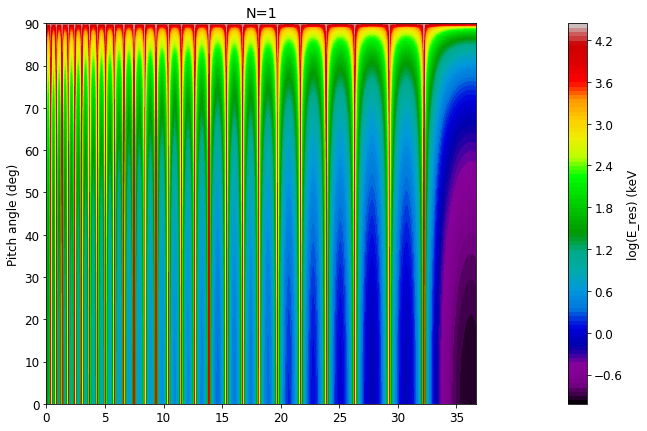

In [16]:
mres=1
alpha_deg=np.arange(0,91,1)
alpha=np.deg2rad(alpha_deg)
time,psi,Ekev_res,upar_res,uper_res,gamma_res=ray.resonance_along_raypath('example_rays/freq2464_psi-89_L2_lamda_-5_v2.ray_appended.csv',mres,alpha)

E_log=np.log10(Ekev_res)
X, Y=np.meshgrid(time,alpha_deg)

fig,ax = plt.subplots(figsize=(11,7))

eres=ax.contourf(X,Y,E_log,levels=100,cmap='nipy_spectral')

cbar=plt.colorbar(eres, orientation="vertical", pad=0.15)
cbar.set_label('log(E_res) (keV')
ax.set_ylabel("Pitch angle (deg)")
plt.title("N=%d" %mres)
plt.show()



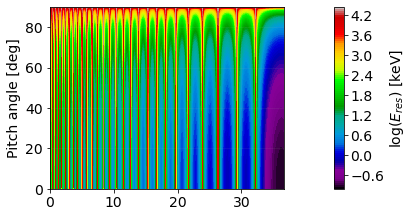

In [55]:
###plot###############################
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
inch_to_mm=0.0393700787
fig, ax = plt.subplots(figsize=(6,85*inch_to_mm))
s=2
fonts=15

eres=ax.contourf(X,Y,E_log,levels=100,cmap='nipy_spectral')

cbar=plt.colorbar(eres, orientation="vertical", pad=0.15)
cbar.set_label('log($E_{res}$) [keV]')
ax.set_ylabel("Pitch angle [deg]")
ax.grid(alpha=.1)

# ax.legend(frameon=False,loc=1, prop={'size': 6})
# ax.set_ylim(0,5)

plt.savefig('energy.jpg',dpi=300, bbox_inches="tight")
plt.show()

[Return to top](#top-bullet) 

## B5. LandauDamp_mod.RayUtils_mod.enhancement_factor <a class="anchor" id="enhancement_factor-bullet"></a>

**Routine to calculate the magnetospheric cavity enhancement factor [Kulkarni et al.[2006]**

***

***

**<font color='red'>Inputs</font>**

**ray_file_name**: output file from ray_mod.append_ray

***

**<font color='green'>Outputs</font>**

Plot with the enhancement factor per L bin.

***
**Reference**

Kulkarni, P., U. S. Inan, and T. F. Bell (2006), Whistler mode illumination of the plasmaspheric resonant cavity via in situinjection of ELF/VLF waves,J. Geophys. Res.,111, A10215, doi:10.1029/2006JA011654.
***

[Return to top](#top-bullet) 

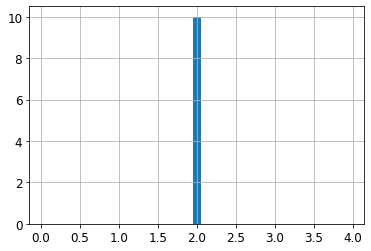

In [19]:
ray.enhancement_factor('example_rays/freq2464_psi-89_L2_lamda_-5_v2.ray_appended.csv')

## B6. LandauDamp_mod.RayUtils_mod.ray_plots <a class="anchor" id="ray_plots-bullet"></a>

**Routine to produce several plots of the ray parameters**

***

**<font color='red'>Inputs</font>**

**ray_file_name**: output file from ray_mod.append_ray

***

**<font color='green'>Outputs</font>**

Plots of ray parameters.

***

[Return to top](#top-bullet) 

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


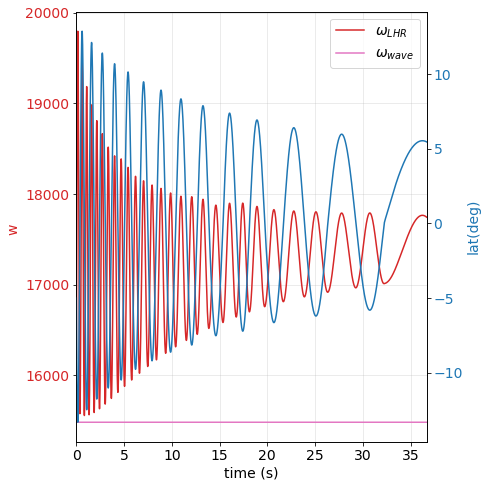

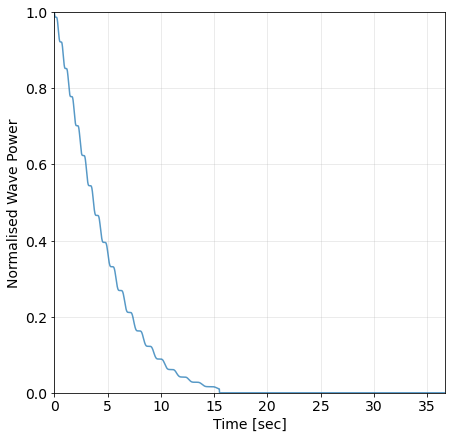

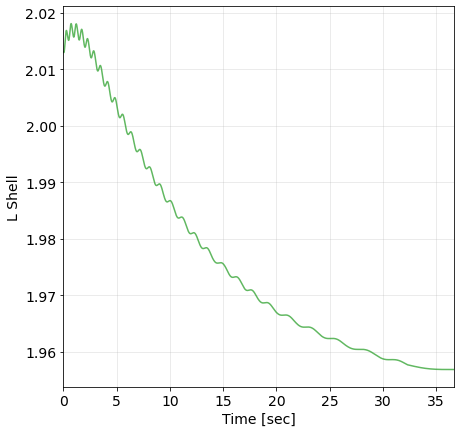

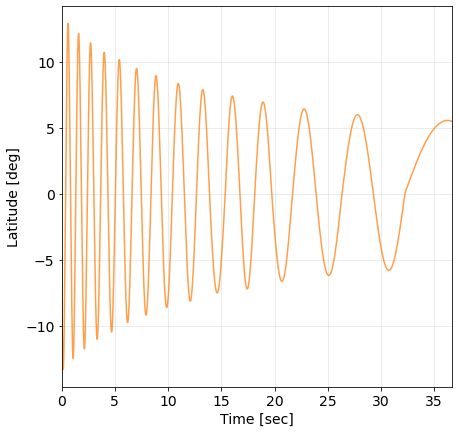

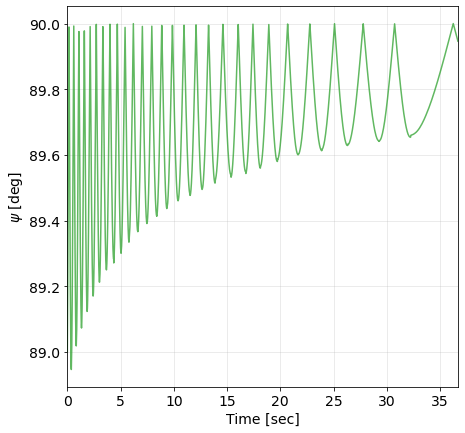

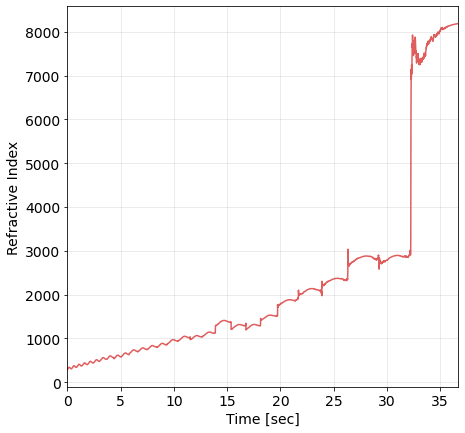

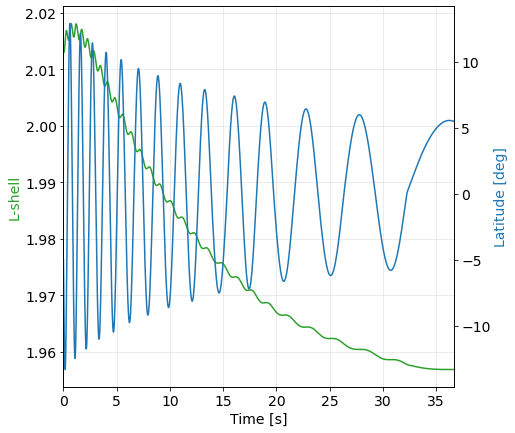

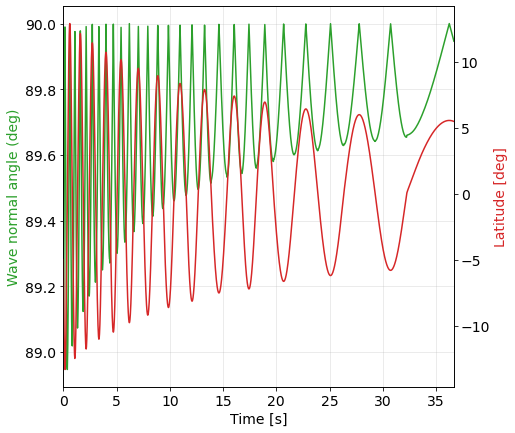

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


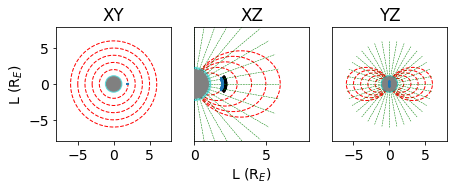

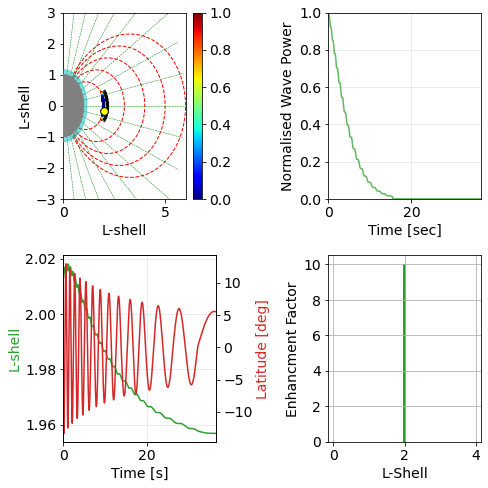

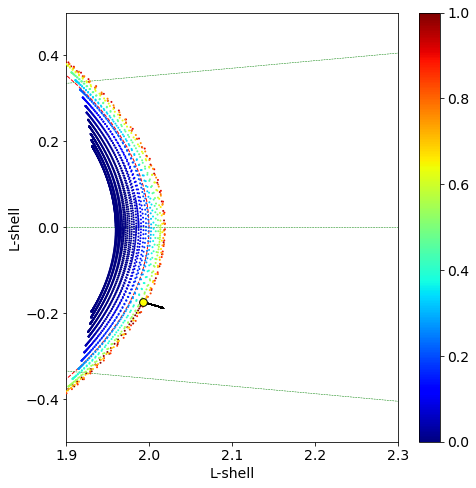

In [20]:
ray.ray_plots('example_rays/freq2464_psi-89_L2_lamda_-5_v2.ray_appended.csv')

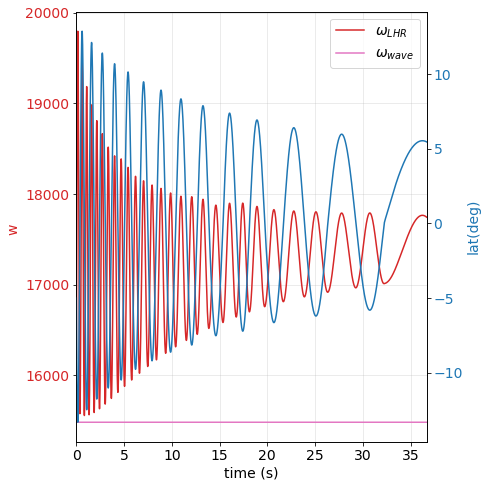

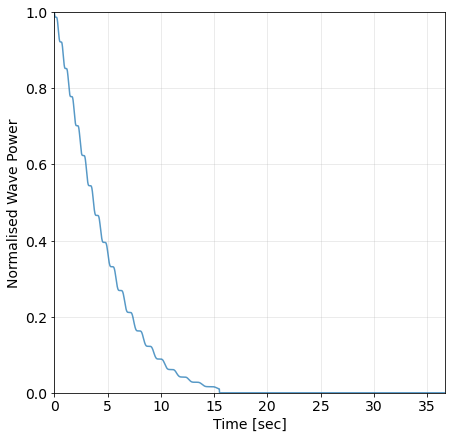

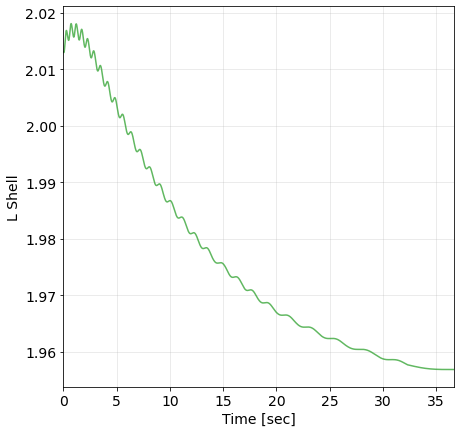

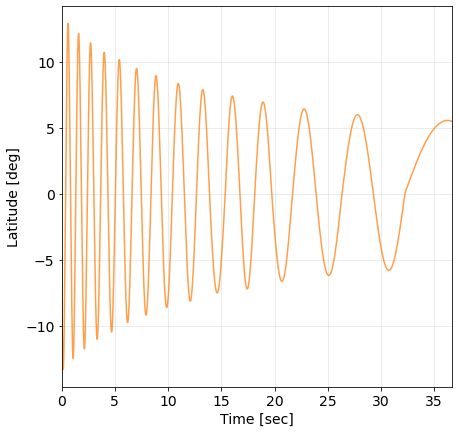

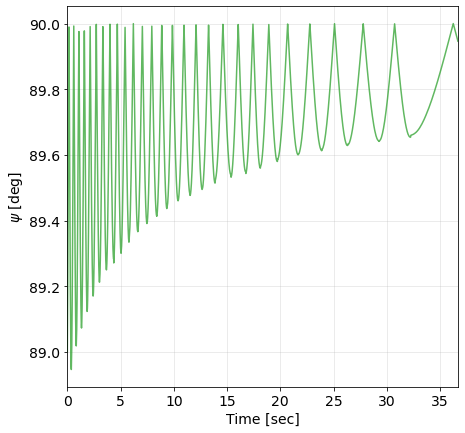

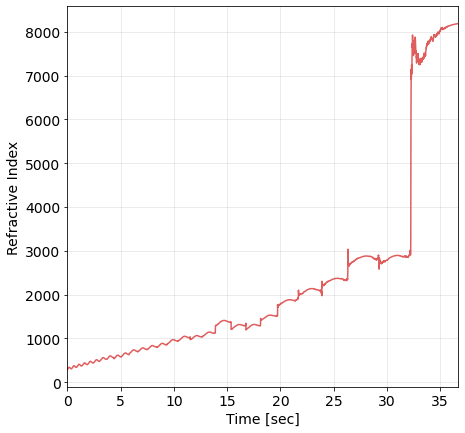

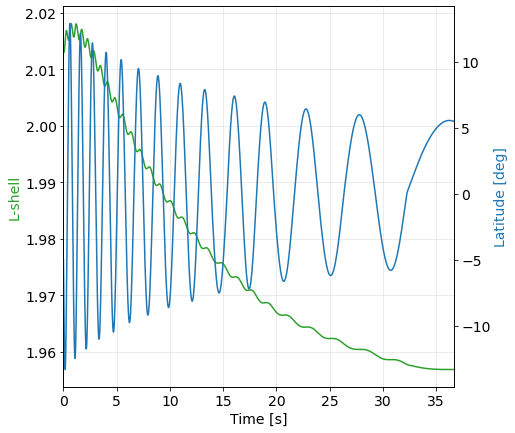

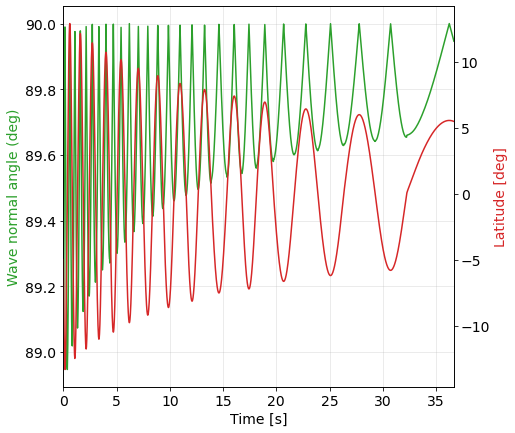

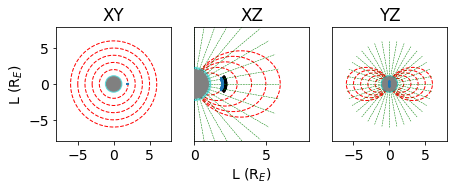

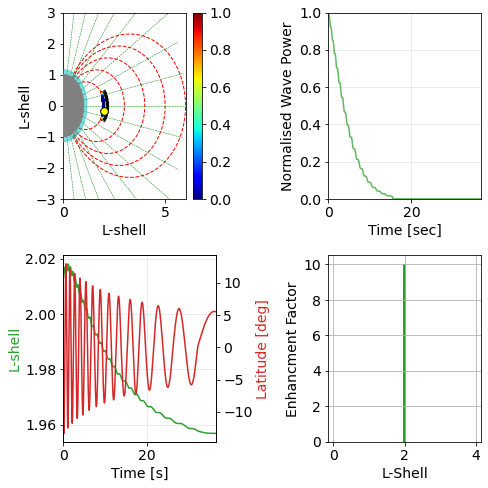

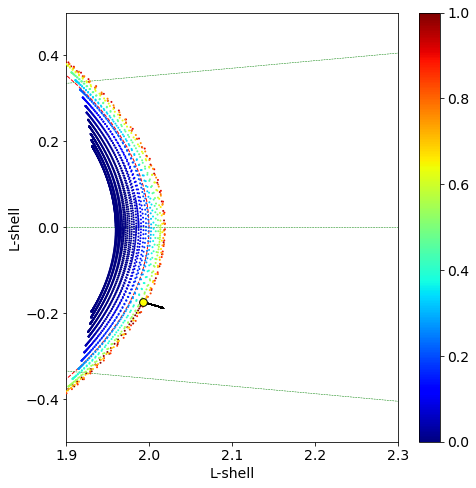

In [30]:
df=pd.read_csv('example_rays/freq2464_psi-89_L2_lamda_-5_v2.ray_appended.csv')
import datetime as dt
from spacepy import coordinates as coord
from spacepy.time import Ticktock
time=df.time
posx=df.posx
posy=df.posy
posz=df.posz
vprelx=df.vprelx
vprely=df.vprely
vprelz=df.vprelz
vgrelx=df.vgrelx
vgrely=df.vgrely
vgrelz=df.vgrelz
nx=df.nx
ny=df.ny
nz=df.nz
Bx=df.Bx
By=df.By
Bz=df.Bz
w=df.w
Ne=df.Ne
NH=df.NH
NHe=df.NHe
NO=df.NO
psi=df.psi
theta_res=df.theta_res
gendrin=df.gendrin
Y=df.Y
L=df.L
alt=df.alt
lat=df.lat
lon=df.lon
damp=df.damp
S_stix=df.S_stix
D_stix=df.D_stix
P_stix=df.P_stix
R_stix=df.R_stix
L_stix=df.L_stix
S_stix=df.S_stix
wce=df.wce
wcH=df.wcH
wcHe=df.wcHe
wcO=df.wcO
wpe=df.wpe
wpH=df.wpH
wpHe=df.wpHe
wpO=df.wpO
wlhr=df.wlhr
wuhr=df.wuhr

ref_ind=np.sqrt(nx*nx+ny*ny+nz*nz)
kpar=w*nz/env.const.c_light

t_new=np.arange(0,max(time),0.0001)
lat_int=np.interp(t_new,time,lat)
L_int=np.interp(t_new,time,L)
mag_int=np.interp(t_new,time,damp)

time_new=[]
lat_new=[]
L_new=[]
mag_new=[]
time_new.append(t_new[0])
lat_new.append(lat_int[0])
L_new.append(L_int[0])
mag_new.append(mag_int[0])
for i in range(1,len(t_new)-1):
    if lat_int[i]>0.0 and lat_int[i+1]<0.0 or lat_int[i]<0.0 and lat_int[i+1]>0.0 :
        time_new.append(t_new[i])
        lat_new.append(lat_int[i])
        L_new.append(L_int[i])
        mag_new.append(mag_int[i])

#Figure parameters
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = 6  # width in inches
fig_height = 6      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'font.size': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('w ', color=color)
ax1.plot(time,wlhr, color=color,label='$\omega_{LHR}$')
ax1.plot(time,w, color="tab:pink",label='$\omega_{wave}$')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0,np.max(time))
ax1.grid(alpha=.3)
ax1.legend()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('lat(deg)', color=color)  # we already handled the x-label with ax1
ax2.plot(time,lat, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# ax2.axhline(y=0,color="black", linestyle="--")
ax1.legend()

#----Power Plot------#
fig2 = plt.figure()
ax2=fig2.add_subplot(111)

ax2.set_ylim(0,1)
ax2.set_xlim(0,np.max(time))

ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('Normalised Wave Power')

ax2.plot(time,damp,c='tab:blue', alpha=0.75)
plt.grid(axis='both', alpha=.3)
plt.show()

#----L Plot------#
fig2 = plt.figure()
ax2=fig2.add_subplot(111)

# ax2.set_ylim(0,1)
ax2.set_xlim(0,np.max(time))

ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('L Shell')

ax2.plot(time,L,c='tab:green', alpha=0.75)
plt.grid(axis='both', alpha=.3)
plt.show()

#----Lat Plot------#
fig2 = plt.figure()
ax2=fig2.add_subplot(111)

# ax2.set_ylim(0,1)
ax2.set_xlim(0,np.max(time))

ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('Latitude [deg]')

ax2.plot(time,lat,c='tab:orange', alpha=0.75)
plt.grid(axis='both', alpha=.3)
plt.show()

#----Psi Plot------#
fig2 = plt.figure()
ax2=fig2.add_subplot(111)

# ax2.set_ylim(0,1)
ax2.set_xlim(0,np.max(time))

ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('$\psi$ [deg]')

ax2.plot(time,psi,c='tab:green', alpha=0.75)
plt.grid(axis='both', alpha=.3)
plt.show()    

#----Ref Plot------#
fig2 = plt.figure()
ax2=fig2.add_subplot(111)

# ax2.set_ylim(0,1)
ax2.set_xlim(0,np.max(time))

ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('Refractive Index')

ax2.plot(time,ref_ind,c='tab:red', alpha=0.75)
plt.grid(axis='both', alpha=.3)    

#------Combined L-lat---#
fig5 = plt.figure()
ax=fig5.add_subplot(111)
ax.set_xlabel("Time [s]",fontsize=14)
ax.set_ylabel("L-shell",color='tab:green',fontsize=14)
ax.plot(time,L,color='tab:green')
ax.grid(alpha=.3)
ax.set_xlim(0,np.max(time))
ax2=ax.twinx()
# ax2.set_ylim(-20,20)
ax2.plot(time,lat,color='tab:blue')
ax2.set_ylabel("Latitude [deg]",color='tab:blue',fontsize=14)

plt.show()

#------Combined L-lat---#
fig5 = plt.figure()
ax=fig5.add_subplot(111)
ax.set_xlabel("Time [s]",fontsize=14)
ax.set_ylabel("Wave normal angle (deg)",color='tab:green',fontsize=14)
ax.plot(time,psi,color='tab:green')
ax.grid(alpha=.3)
ax.set_xlim(0,np.max(time))
ax2=ax.twinx()
# ax2.set_ylim(-20,20)
ax2.plot(time,lat,c='tab:red')
ax2.set_ylabel("Latitude [deg]",c='tab:red',fontsize=14)

plt.show()    

    #----------------Plot Ray path-----------


D2R = (np.pi/180.0)
R_E = 6371e3
H_IONO=1000e3

psize = 8                     # plot size in earth radii
# L_shells = [1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,3, 4, 5, 6]    # Field lines to draw
L_shells = [2,3, 4, 5, 6]
fig, ax = plt.subplots(1,3)

flashtime = dt.datetime(2010,1,1,0,0,0)
tmp_coords = coord.Coords(list(zip(posx, posy, posz)),'SM','car',units=['m','m','m'])
tvec_datetime = [flashtime + dt.timedelta(seconds=s) for s in time]
tmp_coords.ticks = Ticktock(tvec_datetime)
tmp_coords2=tmp_coords.convert('SM','sph')
tmp_coords = tmp_coords.convert('MAG','car')
# print(tmp_coords[0])
# print(tmp_coords2[0])

ref_indexs=coord.Coords(list(zip(nx, ny, nz)),'SM','car')
tvec_datetime2 = [flashtime + dt.timedelta(seconds=s) for s in time]
ref_indexs.ticks = Ticktock(tvec_datetime2)
ref_indexs2=ref_indexs.convert('SM','sph')
ref_indexs=ref_indexs.convert('MAG','car')

mag_field=coord.Coords(list(zip(Bx, By, Bz)),'SM','car')
tvec_datetime3 = [flashtime + dt.timedelta(seconds=s) for s in time]
mag_field.ticks = Ticktock(tvec_datetime3)
mag_field=mag_field.convert('MAG','car')

# print(tmp_coords[0])
# print(ref_indexs[0])
# print(mag_field[0])




posx=tmp_coords.x
posy=tmp_coords.y
posz=tmp_coords.z
nx=ref_indexs.x
ny=ref_indexs.y
nz=ref_indexs.z
Bx=mag_field.x
Bz=mag_field.y
By=mag_field.z


# print(np.shape(tmp_coords))
# Plot the earth
for i in [0, 1, 2]:
    earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
    iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='c',alpha=0.5, zorder=99)
    ax[i].add_patch(earth)   
    ax[i].add_patch(iono)
    tmp_coords.sim_time = time

# Plot the fieldlines (dipole model; could use something more complex)
for Lf in L_shells:
    # Plot dipole field lines for both profile views
    lam = np.linspace(-80,80,181)
    L_r = Lf*pow(np.cos(lam*D2R),2)
    Lx  = L_r*np.cos(lam*D2R)
    Ly  = L_r*np.sin(lam*D2R)
    ax[1].plot(Lx,Ly,color='r',linewidth=1,linestyle='dashed')   # Field line
    ax[2].plot(Lx,Ly,color='r',linewidth=1,linestyle='dashed')   # Field line
    ax[2].plot(-Lx,Ly,color='r',linewidth=1,linestyle='dashed')  # Field line (other side)

    # Plot equatorial extent for the top-down view
    lam = np.linspace(-180,180,181)
    Lx2  = Lf*np.cos(lam*D2R)
    Ly2  = Lf*np.sin(lam*D2R)
    ax[0].plot(Lx2,Ly2,color='r',linewidth=1,linestyle='dashed')

lw=2

for i in range(0,360,10):
    tmp=i*np.pi/180
    qx=[np.cos(tmp),6*np.cos(tmp)]
    qy=[np.sin(tmp),6*np.sin(tmp)]
    #print(qx,qy)
    ax[2].plot(qx,qy,'g--',linewidth=0.5)
    ax[1].plot(qx,qy,'g--',linewidth=0.5)

nmagxz=np.sqrt(nx**2+nz**2)
nmagyz=np.sqrt(ny**2+nz**2)
nmag=np.sqrt(nx**2+ny**2+nz**2)
Bmagxz=np.sqrt(Bx**2+Bz**2)
Bmagyz=np.sqrt(By**2+Bz**2)
Bmag=np.sqrt(Bx**2+By**2+Bz**2)
# ax[0].plot(posx/R_E, posy/R_E, linewidth=lw)
ax[0].plot(posx/R_E, posy/R_E, linewidth=lw)
if posy[0] < 0:
    ax[1].plot(posx/R_E, posz/R_E, linewidth=lw, zorder=101)
    for kk in range(0,len(posx),5):
        ax[1].quiver( posx[kk]/R_E,  posz[kk]/R_E, nx[kk]/nmagxz[kk], nz[kk]/nmagxz[kk], scale=25.,
        width=0.003, headwidth=2., headlength=3.)
        ax[2].quiver( posy[kk]/R_E,  posz[kk]/R_E, ny[kk]/nmagyz[kk], nz[kk]/nmagyz[kk], scale=25.,
        width=0.003, headwidth=2., headlength=3.)
else:
    ax[1].plot(posx/R_E, posz/R_E, linewidth=lw, zorder=10)
    for kk in range(0,len(posx),5):
        ax[1].quiver(posx[kk]/R_E,  posz[kk]/R_E, nx[kk]/nmagxz[kk], nz[kk]/nmagxz[kk], scale=25.,
        width=0.003, headwidth=2., headlength=3.)
        # ax[1].quiver(posx[kk]/R_E,  posz[kk]/R_E, Bx[kk]/Bmagxz[kk], Bz[kk]/Bmagxz[kk], scale=25.,
        # width=0.003, headwidth=2., headlength=3., color='r')
        ax[2].quiver( posy[kk]/R_E,  posz[kk]/R_E, ny[kk]/nmagyz[kk], nz[kk]/nmagyz[kk], scale=25.,
        width=0.003, headwidth=2., headlength=3.)
        # ax[2].quiver( posy[kk]/R_E,  posz[kk]/R_E, By[kk]/Bmagyz[kk], Bz[kk]/Bmagyz[kk], scale=25.,
        # width=0.003, headwidth=2., headlength=3., color='r')
if  posx[0] > 0:
    ax[2].plot(posy/R_E, posz/R_E, linewidth=lw, zorder=101)
else:
    ax[2].plot(posy/R_E, posz/R_E, linewidth=lw, zorder=10)

ax[0].set_title('XY')
ax[1].set_title('XZ')
ax[2].set_title('YZ')
ax[1].set_yticks([])
ax[2].set_yticks([])

ax[1].set_xlabel('L (R$_E$)')
ax[0].set_ylabel('L (R$_E$)')

ax[0].set_xlim([-psize, psize])
ax[0].set_ylim([-psize, psize])
ax[1].set_xlim([0, psize])
ax[1].set_ylim([-psize/2, psize/2])
ax[2].set_xlim([-psize, psize])
ax[2].set_ylim([-psize, psize])

ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')

plt.show()

#-------------4x4 plot---------------------------------
fig, axs = plt.subplots(2, 2)

earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='c',alpha=0.5, zorder=99)
axs[0,0].add_patch(earth)   
axs[0,0].add_patch(iono)
axs[0,0].set_xlim([-psize, psize])
axs[0,0].set_ylim([-psize, psize])

for Lf in L_shells:
    # Plot dipole field lines for both profile views
    lam = np.linspace(-80,80,181)
    L_r = Lf*pow(np.cos(lam*D2R),2)
    Lx  = L_r*np.cos(lam*D2R)
    Ly  = L_r*np.sin(lam*D2R)
    axs[0,0].plot(Lx,Ly,color='r',linewidth=1,linestyle='dashed')   # Field line
    axs[0,0].plot(-Lx,Ly,color='r',linewidth=1,linestyle='dashed')
for i in range(0,360,10):
    tmp=i*np.pi/180
    qx=[np.cos(tmp),6*np.cos(tmp)]
    qy=[np.sin(tmp),6*np.sin(tmp)]
    #print(qx,qy)
    axs[0,0].plot(qx,qy,'g--',linewidth=0.5)

if posy[0] < 0:
    sc=axs[0,0].scatter(posx/R_E, posz/R_E, s=4, c=damp, cmap='jet', zorder=101, edgecolor='none')


    for kk in range(0,len(posx),5):
        axs[0,0].quiver( posx[kk]/R_E,  posz[kk]/R_E, nx[kk]/nmagxz[kk], nz[kk]/nmagxz[kk], scale=25.,
        width=0.003, headwidth=2., headlength=3.)
else:
    sc=axs[0,0].scatter(posx/R_E, posz/R_E,s=4, c=damp, cmap='jet',  zorder=10, edgecolor='none')
    for kk in range(0,len(posx),5):
        axs[0,0].quiver(posx[kk]/R_E,  posz[kk]/R_E, nx[kk]/nmagxz[kk], nz[kk]/nmagxz[kk], scale=25.,
        width=0.003, headwidth=2., headlength=3.)

axs[0,0].scatter(posx[0]/R_E, posz[0]/R_E, s=60, c='yellow', zorder=101,edgecolor='black')
plt.colorbar(sc,ax=axs[0,0])
# plt.text(0.5, 0.5, 'matplotlib', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
axs[0,1].set_ylim(0,1)
axs[0,1].set_xlim(0,np.max(time))

axs[0,1].set_xlabel('Time [sec]')
axs[0,1].set_ylabel('Normalised Wave Power')

axs[1,1].set_xlabel('L-Shell')
axs[1,1].set_ylabel('Enhancment Factor')

axs[0,0].set_xlabel('L-shell')
axs[0,0].set_ylabel('L-shell')

axs[0,1].plot(time,damp,c='tab:green', alpha=0.75)
axs[0,1].grid(axis='both', alpha=.3)


axs[1,0].set_xlabel("Time [s]",fontsize=14)
axs[1,0].set_ylabel("L-shell",color='tab:green',fontsize=14)
axs[1,0].plot(time,L,color='tab:green')
axs[1,0].grid(alpha=.3)
axs[1,0].set_xlim(0,np.max(time))
ax2=axs[1,0].twinx()
ax2.plot(time,lat,color='tab:red')
ax2.set_ylabel("Latitude [deg]",color='tab:red',fontsize=14)


bins=np.arange(0.05,4.05,0.1)

axs[1,1].hist(L_new,bins=bins,range=[0,4],density=True,weights=mag_new,color='tab:green')
axs[1,1].grid()



axs[0,0].set_xlim([0, psize-2])
axs[0,0].set_ylim([-(psize-2)/2, (psize-2)/2])

# axs[0,0].set_aspect('equal')
# axs[0,1].set_aspect('equal')
# axs[1,0].set_aspect('equal')
# axs[1,1].set_aspect('equal')
plt.tight_layout()
plt.show()


fig, axs = plt.subplots()

earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='c',alpha=0.5, zorder=99)
axs.add_patch(earth)   
axs.add_patch(iono)
axs.set_xlim([-psize, psize])
axs.set_ylim([-psize, psize])

for Lf in L_shells:
    # Plot dipole field lines for both profile views
    lam = np.linspace(-80,80,181)
    L_r = Lf*pow(np.cos(lam*D2R),2)
    Lx  = L_r*np.cos(lam*D2R)
    Ly  = L_r*np.sin(lam*D2R)
    axs.plot(Lx,Ly,color='r',linewidth=1,linestyle='dashed')   # Field line
    axs.plot(-Lx,Ly,color='r',linewidth=1,linestyle='dashed')
for i in range(0,360,10):
    tmp=i*np.pi/180
    qx=[np.cos(tmp),6*np.cos(tmp)]
    qy=[np.sin(tmp),6*np.sin(tmp)]
    #print(qx,qy)
    axs.plot(qx,qy,'g--',linewidth=0.5)

if posy[0] < 0:
    sc=axs.scatter(posx/R_E, posz/R_E, s=4, c=damp, cmap='jet', zorder=101, edgecolor='none')


    for kk in range(0,len(posx),20):
        axs.quiver( posx[0]/R_E,  posz[0]/R_E, nx[0]/nmagxz[0], nz[0]/nmagxz[0], scale=15.,
        width=0.003, headwidth=2., headlength=3.)
else:
    sc=axs.scatter(posx/R_E, posz/R_E,s=4, c=damp, cmap='jet',  zorder=10, edgecolor='none')
    for kk in range(0,len(posx),20):
        axs.quiver(posx[0]/R_E,  posz[0]/R_E, nx[0]/nmagxz[0], nz[0]/nmagxz[0], scale=15.,
        width=0.003, headwidth=2., headlength=3.)

axs.scatter(posx[0]/R_E, posz[0]/R_E, s=60, c='yellow', zorder=101,edgecolor='black')
plt.colorbar(sc,ax=axs)
# plt.text(0.5, 0.5, 'matplotlib', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)


axs.set_xlabel('L-shell')
axs.set_ylabel('L-shell')

#     axs.set_xlim([0, psize])
#     axs.set_ylim([-(psize)/2, (psize)/2])
axs.set_xlim([1.9, 2.3])
axs.set_ylim([-0.5, 0.5])
# axs[0,0].set_aspect('equal')
# axs[0,1].set_aspect('equal')
# axs[1,0].set_aspect('equal')
# axs[1,1].set_aspect('equal')
plt.tight_layout()
plt.show()

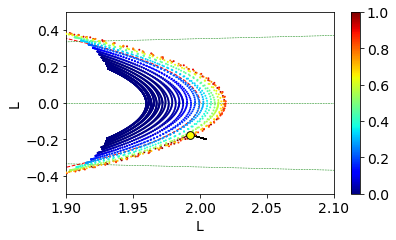

In [36]:
###plot###############################
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
inch_to_mm=0.0393700787
fig, axs = plt.subplots(figsize=(6,85*inch_to_mm))
s=2
earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='c',alpha=0.5, zorder=99)
axs.add_patch(earth)   
axs.add_patch(iono)
axs.set_xlim([-psize, psize])
axs.set_ylim([-psize, psize])

for Lf in L_shells:
    # Plot dipole field lines for both profile views
    lam = np.linspace(-80,80,181)
    L_r = Lf*pow(np.cos(lam*D2R),2)
    Lx  = L_r*np.cos(lam*D2R)
    Ly  = L_r*np.sin(lam*D2R)
    axs.plot(Lx,Ly,color='r',linewidth=1,linestyle='dashed')   # Field line
    axs.plot(-Lx,Ly,color='r',linewidth=1,linestyle='dashed')
for i in range(0,360,10):
    tmp=i*np.pi/180
    qx=[np.cos(tmp),6*np.cos(tmp)]
    qy=[np.sin(tmp),6*np.sin(tmp)]
    #print(qx,qy)
    axs.plot(qx,qy,'g--',linewidth=0.5)

if posy[0] < 0:
    sc=axs.scatter(posx/R_E, posz/R_E, s=4, c=damp, cmap='jet', zorder=101, edgecolor='none')


    for kk in range(0,len(posx),20):
        axs.quiver( posx[0]/R_E,  posz[0]/R_E, nx[0]/nmagxz[0], nz[0]/nmagxz[0], scale=15.,
        width=0.003, headwidth=2., headlength=3.)
else:
    sc=axs.scatter(posx/R_E, posz/R_E,s=4, c=damp, cmap='jet',  zorder=10, edgecolor='none')
    for kk in range(0,len(posx),20):
        axs.quiver(posx[0]/R_E,  posz[0]/R_E, nx[0]/nmagxz[0], nz[0]/nmagxz[0], scale=15.,
        width=0.003, headwidth=2., headlength=3.)

axs.scatter(posx[0]/R_E, posz[0]/R_E, s=60, c='yellow', zorder=101,edgecolor='black')
plt.colorbar(sc,ax=axs)
# plt.text(0.5, 0.5, 'matplotlib
# ', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)


axs.set_xlabel('L')
axs.set_ylabel('L')

#     axs.set_xlim([0, psize])
#     axs.set_ylim([-(psize)/2, (psize)/2])
axs.set_xlim([1.9, 2.1])
axs.set_ylim([-0.5, 0.5])

plt.savefig('raypath.jpg',dpi=300, bbox_inches="tight")
plt.show()

No handles with labels found to put in legend.
/home/tourgaidis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: AutoMinorLocator does not work with logarithmic scale
/home/tourgaidis/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


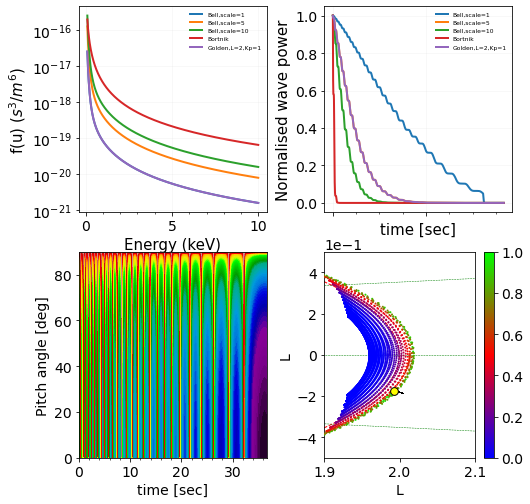

In [53]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})
import matplotlib.ticker as tck

mres=1
alpha_deg=np.arange(0,91,1)
alpha=np.deg2rad(alpha_deg)
time,psi,Ekev_res,upar_res,uper_res,gamma_res=ray.resonance_along_raypath('example_rays/freq2464_psi-89_L2_lamda_-5_v2.ray_appended.csv',mres,alpha)

E_log=np.log10(Ekev_res)
X, Y=np.meshgrid(time,alpha_deg)

###################################################################
fig, ax = plt.subplots(2,2)
# fig.suptitle('Environment_mod parameters')
plt.tight_layout()
############
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,0].plot(Ekev_range,f_bell,label='Bell,scale=1',linewidth=s)
ax[0,0].plot(Ekev_range,5*f_bell,label='Bell,scale=5',linewidth=s)
ax[0,0].plot(Ekev_range,10*f_bell,label='Bell,scale=10',linewidth=s)
ax[0,0].plot(Ekev_range,f_bortnik,label='Bortnik',linewidth=s)
ax[0,0].plot(Ekev_range,f_goldenL2,label='Golden,L=2,Kp=1',linewidth=s)
ax[0,0].set_yscale('log')
ax[0,0].grid(alpha=.1)

ax[0,0].set_ylabel('f(u) ($s^3/m^6$)',fontsize=fonts)
ax[0,0].set_xlabel(r'Energy (keV)',fontsize=fonts)
ax[0,0].legend(frameon=False,loc=1, prop={'size': 6})
# ax.set_ylim(0.5*10**(-12),1.5*10**(-12))
# ax.legend(frameon=False)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,0].yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,0].xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0,1].plot(timebell1,dampbell1,label='Bell,scale=1',linewidth=s)
ax[0,1].plot(timebell5,dampbell5,label='Bell,scale=5',linewidth=s)
ax[0,1].plot(timebell10,dampbell10,label='Bell,scale=10',linewidth=s)
ax[0,1].plot(timebortnik,dampbortnik,label='Bortnik',linewidth=s)
ax[0,1].plot(timegolden,dampgolden,label='Golden,L=2,Kp=1',linewidth=s)
ax[0,1].grid(alpha=.1)
ax[0,1].tick_params(labelbottom = False)
ax[0,1].set_ylabel('Normalised wave power',fontsize=fonts)
ax[0,1].set_xlabel(r'time [sec]',fontsize=fonts)
ax[0,1].legend(frameon=False,loc=1, prop={'size': 6})
# ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[0,1].xaxis.set_minor_locator(tck.AutoMinorLocator())

###################



# ax[1,0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

eres=ax[1,0].contourf(X,Y,E_log,levels=100,cmap='nipy_spectral')

# cbar=plt.colorbar(eres, orientation="vertical", pad=0.15)
# cbar.set_label('log($E_{res}$) [keV]')
ax[1,0].set_ylabel("Pitch angle [deg]")
ax[1,0].set_xlabel("time [sec]")
ax[1,0].legend(frameon=False,loc=4, prop={'size': 6})
# ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax[1,0].xaxis.set_minor_locator(tck.AutoMinorLocator())


##########################################
ax[1,1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
s=2
earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)
iono  = plt.Circle((0,0),(R_E + H_IONO)/R_E, color='c',alpha=0.5, zorder=99)
ax[1,1].add_patch(earth)   
ax[1,1].add_patch(iono)
ax[1,1].set_xlim([-psize, psize])
ax[1,1].set_ylim([-psize, psize])

for Lf in L_shells:
    # Plot dipole field lines for both profile views
    lam = np.linspace(-80,80,181)
    L_r = Lf*pow(np.cos(lam*D2R),2)
    Lx  = L_r*np.cos(lam*D2R)
    Ly  = L_r*np.sin(lam*D2R)
    ax[1,1].plot(Lx,Ly,color='r',linewidth=1,linestyle='dashed')   # Field line
    ax[1,1].plot(-Lx,Ly,color='r',linewidth=1,linestyle='dashed')
for i in range(0,360,10):
    tmp=i*np.pi/180
    qx=[np.cos(tmp),6*np.cos(tmp)]
    qy=[np.sin(tmp),6*np.sin(tmp)]
    #print(qx,qy)
    ax[1,1].plot(qx,qy,'g--',linewidth=0.5)

if posy[0] < 0:
    sc=ax[1,1].scatter(posx/R_E, posz/R_E, s=4, c=damp, cmap='brg', zorder=101, edgecolor='none')


    for kk in range(0,len(posx),20):
        ax[1,1].quiver( posx[0]/R_E,  posz[0]/R_E, nx[0]/nmagxz[0], nz[0]/nmagxz[0], scale=15.,
        width=0.003, headwidth=2., headlength=3.)
else:
    sc=ax[1,1].scatter(posx/R_E, posz/R_E,s=4, c=damp, cmap='jet',  zorder=10, edgecolor='none')
    for kk in range(0,len(posx),20):
        ax[1,1].quiver(posx[0]/R_E,  posz[0]/R_E, nx[0]/nmagxz[0], nz[0]/nmagxz[0], scale=15.,
        width=0.003, headwidth=2., headlength=3.)

ax[1,1].scatter(posx[0]/R_E, posz[0]/R_E, s=60, c='yellow', zorder=101,edgecolor='black')
plt.colorbar(sc,ax=ax[1,1])
# plt.text(0.5, 0.5, 'matplotlib
# ', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)


ax[1,1].set_xlabel('L')
ax[1,1].set_ylabel('L')

#     ax[1,1].set_xlim([0, psize])
#     ax[1,1].set_ylim([-(psize)/2, (psize)/2])
ax[1,1].set_xlim([1.9, 2.1])
ax[1,1].set_ylim([-0.5, 0.5])


    
plt.savefig('multi_landau.jpg',dpi=300, bbox_inches="tight")
plt.show()